<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-1-mg-basics/1-model-problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

Let's set up a matrix
$$
A = 
\left[
\begin{array}{r r r r r}
2 & -1 &  & & \\
-1 & 2 & -1 & & \\
   & -1 & 2 & -1 & \\
& & \ddots & & \\
& & & -1 & 2
\end{array}
\right]
$$

In [2]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

Then look at the eigenvalues and eigenvectors of $A$.

Here we will sort the values before proceeding.

In [3]:
# eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(A.toarray())

# sort eigenvalues
eid = np.argsort(evals)
evals = evals[eid]
evecs = evecs[:,eid]

Since we are solving the interior problem on an $n$ point mesh, we'll use $n+2$ points for the grid and take the $n$ interior points for plotting.

The boundary conditions are $u(0)=u(1)=0$. Alternatively we can plot zero at the ends.

Text(0.5, 0, 'x')

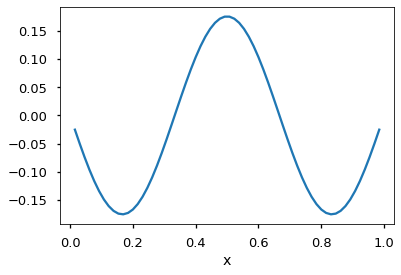

In [4]:
x = np.linspace(0,1,n+2)[1:-1]
plt.plot(x,evecs[:,2])
plt.xlabel('x')

Now plot a few modes, $k$.

Notice the smaller eigenvalues correspond to the Fourier modes.

For $n$ points, on a grid from 0 to $n+1$, we have
$$
\lambda_k = 4 \sin^{2} \left(\frac{k \pi}{2(n+1)}\right)
$$
where $k=1,\dots,n$, and the $j^{th}$ point of the eigenvector given by (zero based: $j=0,\dots,n-1$)
$$
(v_k)_j = \sin\left(\frac{(j+1)*k\pi}{n+1}\right)
$$

eig k=0: eval_k=0.002335546335347203
eig k=2: eval_k=0.020987201097898207
eig k=5: eval_k=0.0835083417816679


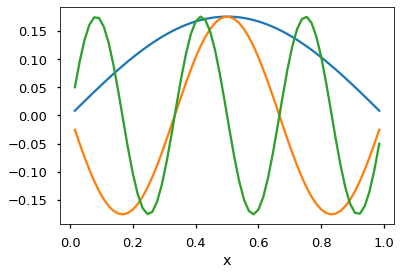

In [5]:
for k in [0,2,5]:
    print(f'eig k={k}: eval_k={evals[k]}')
    plt.plot(x,evecs[:,k])
    plt.xlabel('x')

These appear (up to sign) to be the same as the eigenvectors of $A$ --- and they are!

In [6]:
z_evals = 4 * np.sin(np.arange(1,n+1)*np.pi / (2*(n+1)))**2
z_evecs = np.zeros((n,n))
for k in range(1,n):
    z_evecs[:,k-1] = np.sin(np.arange(1,n+1) * k * np.pi / (n+1))
    
    # also, give unit-L2 norm in length
    z_evecs[:,k-1] = z_evecs[:,k-1] / np.linalg.norm(z_evecs[:,k-1])

mode k=1: eval_k=0.002335546335346823
mode k=3: eval_k=0.020987201097897795
mode k=6: eval_k=0.08350834178166758


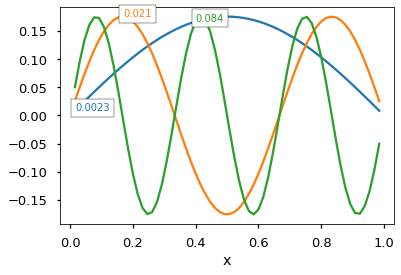

In [7]:
for k in [0,2,5]:
    print(f'mode k={k+1}: eval_k={z_evals[k]}')
    line, = plt.plot(x,z_evecs[:,k])
    plt.xlabel('x')
    c = plt.getp(line,'color')
    plt.text(x[5*k], z_evecs[5*k,k], f'{z_evals[k]:4.2}', color=c,
            bbox=dict(facecolor='w'))

Now, let's plot the eigevalues, and shift / scale them so they land within $[-1,1]$:

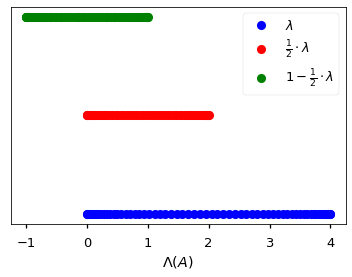

In [8]:
plt.plot(evals, 0*evals, 'bo', label=r'$\lambda$')
plt.plot(0.5*evals, 1+0*evals, 'ro', label=r'$\frac{1}{2}\cdot\lambda$')
plt.plot(1-0.5*evals, 2+0*evals, 'go', label=r'$1-\frac{1}{2}\cdot\lambda$')

plt.yticks([])
plt.xlabel(r'$\Lambda(A)$')
plt.legend()

Look at two modes: a relatively "smooth" mode, and a relatively "oscilliatory" mode.

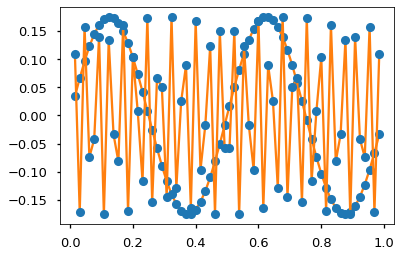

In [9]:
plt.plot(x,z_evecs[:,3], 'o-', color='tab:orange', markerfacecolor='tab:blue')
plt.plot(x,z_evecs[:,50], 'o-', color='tab:orange', markerfacecolor='tab:blue')